In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Setting up plotting configurations
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sns.set(style='whitegrid', palette='muted', rc={'figure.figsize': (15, 10)})

# Load data as Pandas dataframe
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

# Convert 'Sex' column to category codes
df['Sex'] = df['Sex'].astype('category').cat.codes

# One-hot encode categorical variables
categorical = ['Embarked', 'Title']
for var in categorical:
    df = pd.concat([df, pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

# Drop unnecessary columns
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Scale continuous variables
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']
scaler = StandardScaler()
for var in continuous:
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

# Split data into train and test sets
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

# Set up the neural network model
lyrs = [8]
act = 'linear'
opt = 'Adam'
dr = 0.0

tf.random.set_seed(42)

model = Sequential()
model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))

# Add additional hidden layers
for i in range(1, len(lyrs)):
    model.add(Dense(lyrs[i], activation=act))

# Add dropout layer
model.add(Dropout(dr))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Print model summary
print(model.summary())

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None




Validation Accuracy: 86.18%


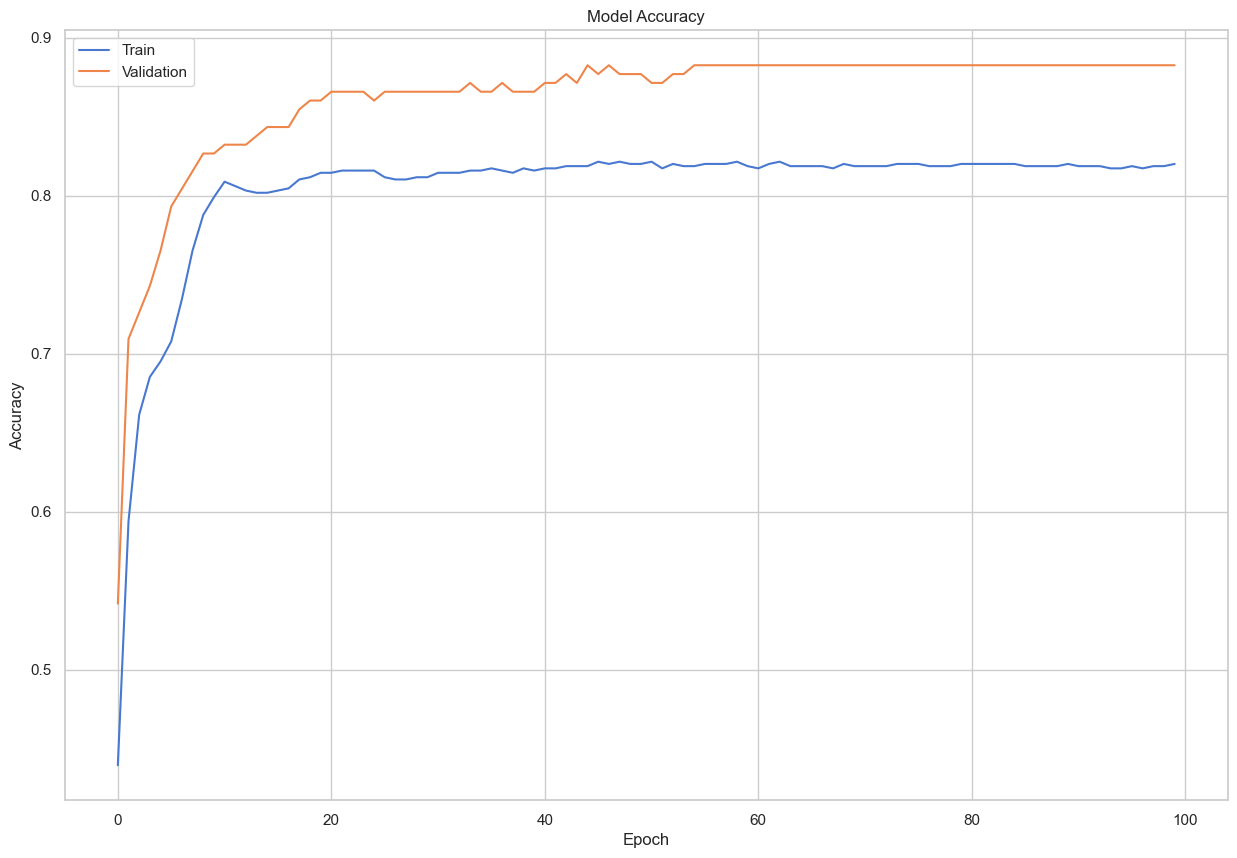

In [2]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

# Train model on full train set with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Calculate mean validation accuracy
val_acc = np.mean(training.history['val_accuracy'])
print("Validation Accuracy: %.2f%%" % (val_acc*100))

# Plot accuracy history
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Good Job!